In [4]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle
%matplotlib inline

# Read in Original pickled data (test)

In [2]:
# Read in Original pickled data (test)
# data=pd.read_csv('mnist.csv')
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
input_data = X / 255.0
print(input_data.shape)
# data=pd.DataFrame(input_data)
# data.head()
new_array = []
for image in input_data:
    new_image = np.array(image)
    new_image = new_image.flatten(order='C')
    new_image.shape
    new_array.append(new_image)
new_array = np.array(new_array)
print(new_array.shape)
data=pd.DataFrame(new_array)
data.head()
# image_data = np.array(input_data)
# image_data.flatten()
# print(image_data)

(160, 56, 56, 1)
(160, 3136)


,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,0.027451,0.011765,0.019608,0.015686,0.019608,0.086275,0.176471,0.301961,0.400000,0.450980,...,0.733333,0.713725,0.698039,0.654902,0.588235,0.533333,0.458824,0.368627,0.231373,0.117647
1,0.003922,0.003922,0.000000,0.003922,0.003922,0.007843,0.003922,0.000000,0.003922,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.372549,0.411765,0.458824,0.490196,0.513725,0.529412,0.537255,0.564706,0.576471,0.568627,...,0.611765,0.619608,0.627451,0.615686,0.607843,0.588235,0.560784,0.513725,0.505882,0.462745
3,0.239216,0.294118,0.349020,0.384314,0.435294,0.462745,0.498039,0.498039,0.494118,0.490196,...,0.305882,0.298039,0.254902,0.278431,0.301961,0.278431,0.239216,0.180392,0.133333,0.101961
4,0.188235,0.235294,0.333333,0.384314,0.384314,0.419608,0.450980,0.474510,0.552941,0.529412,...,0.419608,0.435294,0.419608,0.392157,0.368627,0.294118,0.239216,0.203922,0.145098,0.105882


In [3]:
a = data.iloc[19,0:].values
a = a.reshape(28,28).astype('uint8') # 56, 56

ValueError: cannot reshape array of size 3136 into shape (28,28)

### Read and process malignant images
160 56x56 RBG images

#### Malignant (original dataset)

In [5]:
pickle_in = open("malignant_final.pickle","rb")
X = pickle.load(pickle_in)
input_data_m = X / 255.0
print(input_data_m.shape)
new_array = []
for image in input_data_m:
    new_image = np.array(image)
    new_image = new_image.flatten(order='C')
    new_image.shape
    new_array.append(new_image)
new_array_x_m = np.array(new_array)
print(new_array_x_m.shape)
df_x_malignant=pd.DataFrame(new_array_x_m)
df_x_malignant.head()

(160, 56, 56, 1)
(160, 3136)


,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,0.027451,0.011765,0.019608,0.015686,0.019608,0.086275,0.176471,0.301961,0.400000,0.450980,...,0.733333,0.713725,0.698039,0.654902,0.588235,0.533333,0.458824,0.368627,0.231373,0.117647
1,0.003922,0.003922,0.000000,0.003922,0.003922,0.007843,0.003922,0.000000,0.003922,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.372549,0.411765,0.458824,0.490196,0.513725,0.529412,0.537255,0.564706,0.576471,0.568627,...,0.611765,0.619608,0.627451,0.615686,0.607843,0.588235,0.560784,0.513725,0.505882,0.462745
3,0.239216,0.294118,0.349020,0.384314,0.435294,0.462745,0.498039,0.498039,0.494118,0.490196,...,0.305882,0.298039,0.254902,0.278431,0.301961,0.278431,0.239216,0.180392,0.133333,0.101961
4,0.188235,0.235294,0.333333,0.384314,0.384314,0.419608,0.450980,0.474510,0.552941,0.529412,...,0.419608,0.435294,0.419608,0.392157,0.368627,0.294118,0.239216,0.203922,0.145098,0.105882


### Benign (original dataset)

In [6]:
pickle_in = open("benign_final.pickle","rb")
X = pickle.load(pickle_in)
input_data_b = X / 255.0
print(input_data_b.shape)
new_array = []
for image in input_data_b:
    new_image = np.array(image)
    new_image = new_image.flatten(order='C')
    new_image.shape
    new_array.append(new_image)
new_array_x_benign = np.array(new_array)
print(new_array_x_benign.shape)
df_x_benign=pd.DataFrame(new_array_x_benign)
df_x_benign.head()

(160, 56, 56, 1)
(160, 3136)


,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,0.682353,0.725490,0.749020,0.772549,0.780392,0.788235,0.811765,0.796078,0.800000,0.800000,...,0.835294,0.831373,0.858824,0.854902,0.850980,0.854902,0.854902,0.850980,0.847059,0.847059
1,0.513725,0.549020,0.576471,0.607843,0.631373,0.650980,0.658824,0.666667,0.678431,0.678431,...,0.694118,0.701961,0.694118,0.713725,0.705882,0.698039,0.698039,0.698039,0.686275,0.686275
2,0.082353,0.149020,0.215686,0.266667,0.376471,0.400000,0.466667,0.505882,0.533333,0.549020,...,0.650980,0.611765,0.615686,0.592157,0.564706,0.533333,0.462745,0.415686,0.352941,0.262745
3,0.713725,0.721569,0.745098,0.709804,0.713725,0.709804,0.717647,0.745098,0.705882,0.709804,...,0.639216,0.627451,0.650980,0.643137,0.647059,0.603922,0.623529,0.627451,0.615686,0.631373
4,0.749020,0.733333,0.780392,0.756863,0.752941,0.764706,0.792157,0.803922,0.788235,0.784314,...,0.678431,0.701961,0.686275,0.678431,0.698039,0.721569,0.701961,0.694118,0.682353,0.701961


### Malignant (modified with fake images)

In [9]:
pickle_in = open("malignant_final_mod.pickle","rb")
X = pickle.load(pickle_in)
input_data_b = X / 255.0
print(input_data_b.shape)
new_array = []
for image in input_data_b:
    new_image = np.array(image)
    new_image = new_image.flatten(order='C')
    new_image.shape
    new_array.append(new_image)
new_array_x_malignant_modified = np.array(new_array)
print(new_array_x_malignant_modified.shape)
df_x_malignant_modified=pd.DataFrame(new_array_x_malignant_modified)
df_x_malignant_modified.head()

(176, 56, 56, 1)
(176, 3136)


,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,0.027451,0.011765,0.019608,0.015686,0.019608,0.086275,0.176471,0.301961,0.400000,0.450980,...,0.733333,0.713725,0.698039,0.654902,0.588235,0.533333,0.458824,0.368627,0.231373,0.117647
1,0.003922,0.003922,0.000000,0.003922,0.003922,0.007843,0.003922,0.000000,0.003922,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.372549,0.411765,0.458824,0.490196,0.513725,0.529412,0.537255,0.564706,0.576471,0.568627,...,0.611765,0.619608,0.627451,0.615686,0.607843,0.588235,0.560784,0.513725,0.505882,0.462745
3,0.239216,0.294118,0.349020,0.384314,0.435294,0.462745,0.498039,0.498039,0.494118,0.490196,...,0.305882,0.298039,0.254902,0.278431,0.301961,0.278431,0.239216,0.180392,0.133333,0.101961
4,0.188235,0.235294,0.333333,0.384314,0.384314,0.419608,0.450980,0.474510,0.552941,0.529412,...,0.419608,0.435294,0.419608,0.392157,0.368627,0.294118,0.239216,0.203922,0.145098,0.105882


In [10]:
# list = [df_x_malignant, df_x_benign]
# df_x = pd.concat(list)
# df_x.shape()

# df_x is images starting with benign, then malignant
df_x = df_x_benign.append(df_x_malignant)

# df_x_mod is images starting with benign, then malignant, then fake malignant
df_x_mod = df_x_benign.append(df_x_malignant_modified)

In [11]:
df_y = []
df_y_mod = []
for x in range(0, 160):
    df_y.append(0)
    df_y_mod.append(0)
for x in range(0, 160):
    df_y.append(1)
    df_y_mod.append(0)
for x in range(0, 16): # add the additional 16 fake images
    df_y_mod.append(1)
    
df_y = pd.DataFrame(df_y)
df_y_mod = pd.DataFrame(df_y_mod)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)
x_train_mod, x_test_mod, y_train_mod, y_test_mod = train_test_split(df_x_mod, df_y_mod, test_size=0.2, random_state=4)

In [13]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

y_train_mod = np.ravel(y_train_mod)
y_test_mod = np.ravel(y_test_mod)

In [14]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
rf_mod=RandomForestClassifier(n_estimators=100)
rf_mod.fit(x_train_mod, y_train_mod)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
pred=rf.predict(x_test)
pred_mod=rf_mod.predict(x_test_mod)

In [17]:
s=y_test.values
count=0

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [18]:
print(rf.score(x_train, y_train))
print(rf_mod.score(x_train_mod, y_train_mod))

1.0
1.0


In [24]:
print(rf.score(x_test, y_test))
print(rf_mod.score(x_test_mod, y_test_mod))

0.796875
0.9705882352941176


In [25]:
print(rf.score(x_test, y_test))
print(rf_mod.score(x_test, y_test))

0.796875
0.609375


In [30]:
from sklearn import metrics
scores = np.array(rf.predict_proba(x_test)) # predict_log_proba
fpr_rf, tpr_rf, thresholds = metrics.roc_curve(y_test, scores[:,1]) #scores[:,1] gives score for the positive class
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

scores_mod = np.array(rf_mod.predict_proba(x_test)) # predict_log_proba
fpr_rf_mod, tpr_rf_mod, thresholds = metrics.roc_curve(y_test, scores_mod[:,1]) #scores[:,1] gives score for the positive class
roc_auc_rf_mod = metrics.auc(fpr_rf_mod, tpr_rf_mod)


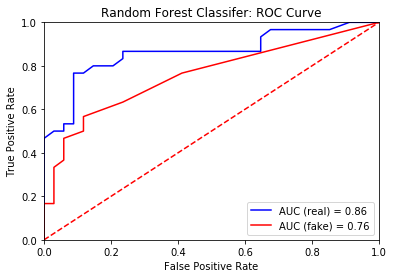

In [31]:
plt.title('Random Forest Classifer: ROC Curve')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC (real) = %0.2f' % roc_auc_rf)
plt.plot(fpr_rf_mod, tpr_rf_mod, 'r', label = 'AUC (fake) = %0.2f' % roc_auc_rf_mod)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision_rf, recall_rf, _ = precision_recall_curve(y_test, scores[:,1])

average_precision_rf = average_precision_score(y_test, scores[:,1])
print('avg precision with feature selection:', average_precision_rf)


precision_rf_mod, recall_rf_mod, _ = precision_recall_curve(y_test, scores_mod[:,1])
average_precision_rf_mod = average_precision_score(y_test, scores_mod[:,1])
print('avg precision with feature selection:', average_precision_rf_mod)

avg precision with feature selection: 0.8812715452210621
avg precision with feature selection: 0.7489425010587291


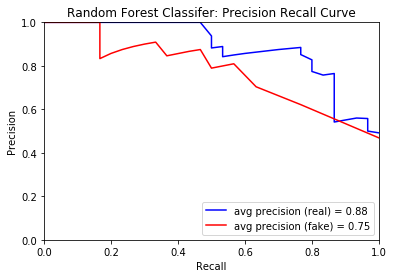

In [34]:
plt.title('Random Forest Classifer: Precision Recall Curve')
plt.plot(recall_rf, precision_rf, 'b', label = 'avg precision (real) = %0.2f' % average_precision_rf)
plt.plot(recall_rf_mod, precision_rf_mod, 'r', label = 'avg precision (fake) = %0.2f' % average_precision_rf_mod)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()